In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ["A10", "B1", "B2", "B52", "C130", "C17", "C5", "E2", "EF2000", "F117", "F14", "F15", "F16", "F18", "F22", "F35", "F4", 
              "J20", "JAS39", "MQ9", "Mig31", "Mirage2000", "RQ4", "Rafale", "SR71", "Su57", "Tu160", "Tu95", "U2", "V22", "XB70", "YF23"]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [4]:
def load_data():
    
    datasets = ['C:\\Users\\tcttn\\Desktop\\Kaggle\\Master\\data2\\train', 'C:\\Users\\tcttn\\Desktop\\Kaggle\\Master\\data2\\test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [15]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|          | 0/117 [00:00<?, ?it/s]

Loading C:\Users\tcttn\Desktop\Kaggle\Master\data2\train


100%|██████████| 68/68 [00:01<00:00, 36.58it/s]
0it [00:00, ?it/s]
  0%|          | 0/30 [00:00<?, ?it/s]

Loading C:\Users\tcttn\Desktop\Kaggle\Master\data2\test


100%|██████████| 18/18 [00:00<00:00, 27.14it/s]
0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 54.20it/s]


In [16]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [17]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2191
Number of testing examples: 567
Each image is of size: (150, 150)


In [18]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

ValueError: Shape of passed values is (31, 2), indices imply (32, 2)

ValueError: 'label' must be of length 'x'

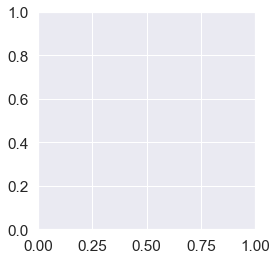

In [19]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [20]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [21]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

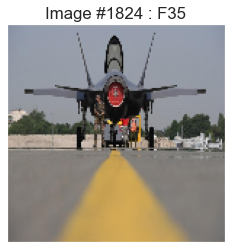

In [22]:
display_random_image(class_names, train_images, train_labels)

In [23]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

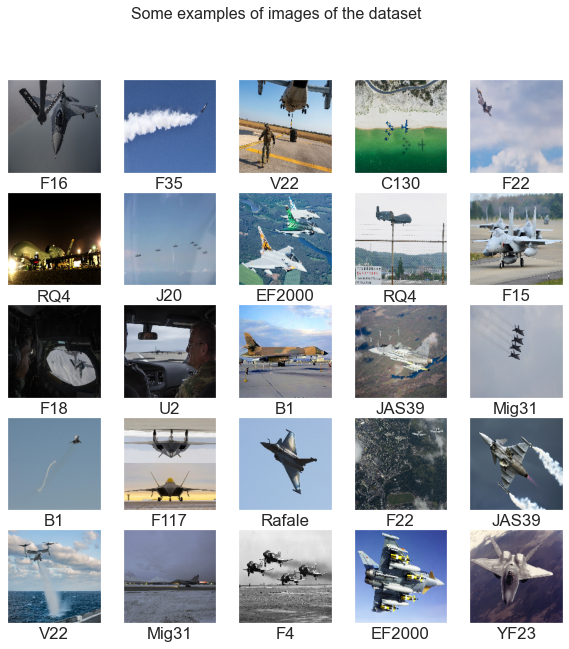

In [24]:
display_examples(class_names, train_images, train_labels)

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.softmax)
])

In [27]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
14/14 [==============================] - 15s 1s/step - loss: 3.6148 - accuracy: 0.0525 - val_loss: 3.4237 - val_accuracy: 0.0524
Epoch 2/20
14/14 [==============================] - 15s 1s/step - loss: 3.3891 - accuracy: 0.0605 - val_loss: 3.3819 - val_accuracy: 0.0638
Epoch 3/20
14/14 [==============================] - 15s 1s/step - loss: 3.3130 - accuracy: 0.0982 - val_loss: 3.3412 - val_accuracy: 0.0683
Epoch 4/20
14/14 [==============================] - 15s 1s/step - loss: 3.1955 - accuracy: 0.1119 - val_loss: 3.3505 - val_accuracy: 0.0524
Epoch 5/20
14/14 [==============================] - 15s 1s/step - loss: 3.0308 - accuracy: 0.1627 - val_loss: 3.3471 - val_accuracy: 0.0661
Epoch 6/20
14/14 [==============================] - 14s 1s/step - loss: 2.7685 - accuracy: 0.2414 - val_loss: 3.4132 - val_accuracy: 0.0797
Epoch 7/20
14/14 [==============================] - 14s 1s/step - loss: 2.3979 - accuracy: 0.3573 - val_loss: 3.5199 - val_accuracy: 0.0638
Epoch 8/20
14/14 [==

In [29]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

KeyError: 'acc'

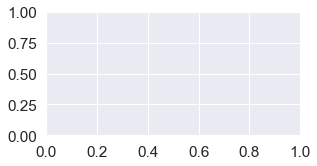

In [30]:
plot_accuracy_loss(history)

In [31]:
test_loss = model.evaluate(test_images, test_labels)

18/18 [==============================] - 1s 68ms/step - loss: 8.7239 - accuracy: 0.0653


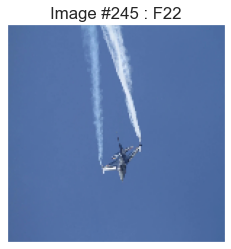

In [32]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [33]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

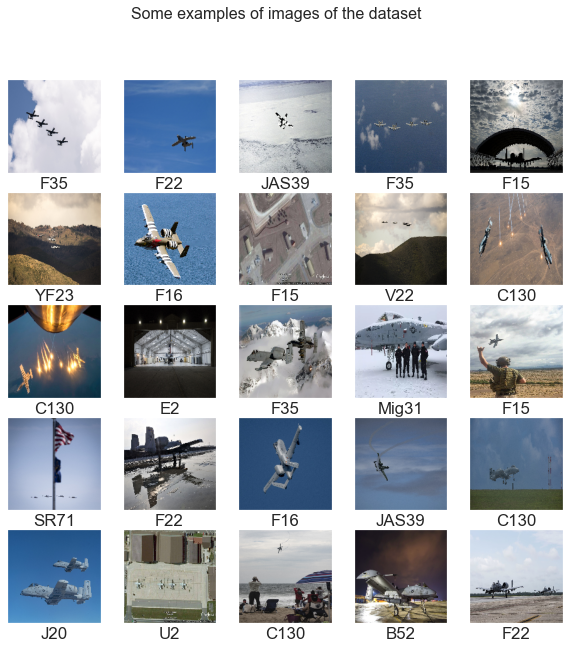

In [34]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

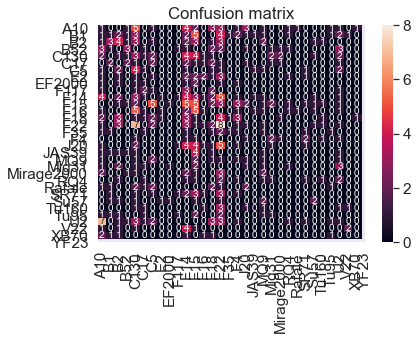

In [35]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [36]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 25s 0us/step


In [37]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [38]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [39]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

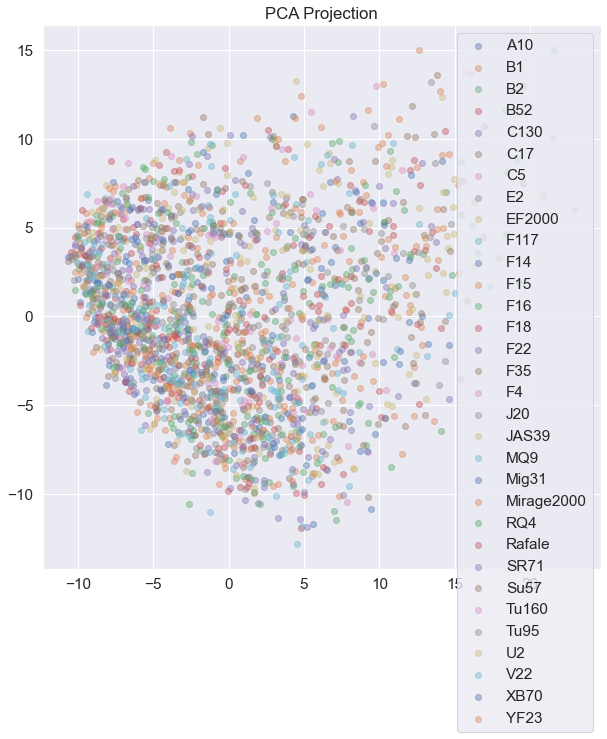

In [40]:
### Figures

plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[train_labels == i][:1000], C2[train_labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [45]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
14/14 [==============================] - 0s 16ms/step - loss: 3.4487 - accuracy: 0.0491 - val_loss: 3.3806 - val_accuracy: 0.0524
Epoch 2/15
14/14 [==============================] - 0s 7ms/step - loss: 3.2761 - accuracy: 0.0885 - val_loss: 3.3263 - val_accuracy: 0.0683
Epoch 3/15
14/14 [==============================] - 0s 7ms/step - loss: 3.1418 - accuracy: 0.1090 - val_loss: 3.3003 - val_accuracy: 0.0706
Epoch 4/15
14/14 [==============================] - 0s 7ms/step - loss: 3.0217 - accuracy: 0.1250 - val_loss: 3.2567 - val_accuracy: 0.0774
Epoch 5/15
14/14 [==============================] - 0s 7ms/step - loss: 2.9083 - accuracy: 0.1752 - val_loss: 3.2408 - val_accuracy: 0.0866
Epoch 6/15
14/14 [==============================] - 0s 7ms/step - loss: 2.8015 - accuracy: 0.2175 - val_loss: 3.2148 - val_accuracy: 0.1071
Epoch 7/15
14/14 [==============================] - 0s 6ms/step - loss: 2.6967 - accuracy: 0.2460 - val_loss: 3.1890 - val_accuracy: 0.1139
Epoch 8/15
14/14 [=

KeyError: 'acc'

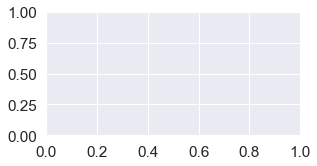

In [47]:
plot_accuracy_loss(history)

In [48]:
test_loss = model2.evaluate(test_features, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 3.2592 - accuracy: 0.1076


In [55]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 8
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [56]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [57]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10


InvalidArgumentError:  Received a label value of 30 which is outside the valid range of [0, 6).  Label values: 27 4 14 16 23 7 0 27 29 1 1 16 2 29 1 1 22 23 8 4 8 2 3 11 25 5 12 24 11 27 13 16 26 2 0 4 1 7 19 4 20 14 3 11 11 15 9 20 2 5 18 13 3 27 1 12 15 14 4 24 10 12 4 4 4 4 0 21 5 10 19 2 5 15 23 14 4 11 12 3 18 24 23 14 18 0 14 22 27 2 2 14 3 4 3 0 26 7 8 0 3 12 27 2 12 17 13 1 27 1 5 11 12 8 0 30 4 15 14 10 0 3 15 25 16 19 11 14
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-57-caf0fd883f5b>:6) ]] [Op:__inference_train_function_10963]

Function call stack:
train_function


In [58]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [59]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.0564373897707231


In [60]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(32,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [ ]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

In [ ]:
history = new_model.fit(train_features, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

In [ ]:
plot_accuracy_loss(history)